In [1]:
import networkx as nx
import re
import matplotlib.pyplot as plt
from networkx.drawing.nx_agraph import graphviz_layout
import os
import numpy as np
import pandas as pd
from networkx.algorithms.shortest_paths.generic import shortest_path_length

In [2]:
def read_file(filename):
    with open(filename, 'r') as f:
        doc = f.read()
        sentences = re.split('\.|\?|!', doc)
    data = [];
    for s in sentences:
        temp = re.split('\W+',s)
        temp = list(filter(lambda a: a != '', temp))
        temp = [t.lower() for t in temp]
        data.append(temp)
    return(data)
def read_directory(directory):
    data = []
    for filename in os.listdir(directory):
        if filename.endswith('.txt'):
            filename = directory + '/' + filename
            temp = read_file(filename)
            for t in temp: 
                data.append(t)
    return(data)


In [3]:
def gen_graph(data):
    G = nx.Graph()
    for s in data:
        prev_word = None
        for word in s:
            if not word in list(G.nodes):
                G.add_node(word)
            if prev_word:
                if not (prev_word,word) in list(G.edges):
                    G.add_edge(prev_word,word)
            prev_word = word
    return(G)
def findResSet(T):
    degs = T.degree()
    root = 0
    path = -1
    for k in degs:
        if k[1] > 1: root = k[0]
        if k[1] > 2:
            path = -1
            break
        if k[1] <= 1: path = k[0]
    if path != -1: return ({}, [path])

    (L, um, _) = partitionLeaves(T, node=root)
    R = []
    for h in L:
        if len(L[h]) > 0:
            i = np.random.choice(len(L[h]))
            R.extend(L[h][:i] + L[h][i+1:])
    return (L, R)

def partitionLeaves(T, node=0,  parent=-1):
    (marked, unmarked, last) = ({}, [], -1)
    N = T.degree(node)
    if N == 1: return (marked, [node], last)
    if N >= 3:
        marked[node] = []
        last = node
    children = [n for n in T.neighbors(node) if n!=parent]
    for child in children:
        (m, um, l) = partitionLeaves(T, node=child, parent=node)
        marked.update(m)
        if len(um) > 0 and N >= 3: marked[node].extend(um)
        else:
            unmarked.extend(um)
            last = l 
    if len(unmarked) > 0 and last != -1: marked[last].extend(unmarked)
    return (marked, unmarked, last)
def distanceMatrix(G):
    keys = list(G.nodes)
    dist_mat = pd.DataFrame()

In [ ]:
def approxGraphMetricDim(G, fullMatrix=True, distance=-1, name='', read_state='', randOrder=True, procs=1):
    check = sorted(G.nodes())
    if fullMatrix:
        D = []
        if distance==-1 or distance>1:
            D = nx.all_pairs_shortest_path_length(G, cutoff=(None if distance==-1 else distance))
            if distance==-1: D = [[D[i].get(j, -1) if i in D else -1 for j in check] for i in check]
            if distance>1: D = [[min(D[i].get(j, distance) if i in D else distance, distance) for j in check] for i in check]
        elif distance==1:
            D = [[1 if j in G.neighbors(i) else 0 for j in check] for i in check]
        return approxMetricDim(D, name=name, read_state=read_state, randOrder=randOrder, procs=procs)
    progress_file = name+'_progress.txt'
    distr = {}
    tags = ['' for _ in xrange(len(check))]
    chosen = []
    if read_state:
        (tags, chosen) = readState(read_state)
        for i in xrange(len(tags)):
            if tags[i] not in distr: distr[tags[i]] = []
            distr[tags[i]].append(i)
    elif name: saveState([], [], progress_file, overwrite=True)
    n = len(G)
    H = 0
    while len(distr) < n and len(chosen) < n:#
        (distr, tags, H, chosen) = pickGraphColumn(G, tags, check, chosen=chosen, distance=distance, procs=procs)
        check.remove(chosen[-1])
        if name: saveState(tags, chosen, progress_file, overwrite=True)
    if len(distr) < n and len(chosen) == n: print('No solution exists', distr)
    return chosen

In [4]:
directory = "test_files"
data = read_directory(directory)
G = gen_graph(data)


In [5]:
tree = nx.maximum_spanning_tree(G)

In [6]:
(L, R) = findResSet(tree)
print(L)

{'order': ['displays', 'hang', 'enter', 'ready', 'bring', 'flow', 'these', 'charging', 'james', 'wider', 'cadillac', 'vary', 'ot', 'friends', 'medium', 'completed', 'mother', 'put', '95', 'received', 'corrected', 'wrong', 'tough', 'structure', 'careful', 'purse'], 'almost': ['pulled', 'payed', '90', 'point', 'anywhere', 'mention', '9', 'decadent', 'steal', 'doing', 'licked', 'zero', 'overcooked'], 'same': ['smell', 'salt', 'remains', 'faces', 'palace', 'floor', 'tolerable', 'league', 'variety', 'turkey', 'applebees', 'screaming', 'reale', 'spot', 'halibut'], 'still': ['contact', 'brenner', 'edible', 'biggie', 'waiting', 'youre', 'pleased', 'supervisors', 'marks', 'missing', 'screens'], 'somewhat': ['obtrusively', 'gal'], 'giving': ['flat', 'unwarranted'], 'made': ['multi', 'reservations', 'jason', 'matt', 'flakes', 'evidently', 'fyi', 'fro', 'worker', 'cinnamon', 'glaze', 'blunder'], 'lemon': ['doused', 'viniagrette', 'vinegar'], 'table': ['periodic', 'elements', 'escorted', 'handfuls'

In [7]:
print(R)

['hang', 'enter', 'ready', 'bring', 'flow', 'these', 'charging', 'james', 'wider', 'cadillac', 'vary', 'ot', 'friends', 'medium', 'completed', 'mother', 'put', '95', 'received', 'corrected', 'wrong', 'tough', 'structure', 'careful', 'purse', 'pulled', 'payed', '90', 'point', 'anywhere', 'mention', '9', 'decadent', 'steal', 'doing', 'licked', 'zero', 'smell', 'salt', 'remains', 'faces', 'palace', 'floor', 'tolerable', 'league', 'variety', 'turkey', 'applebees', 'screaming', 'reale', 'spot', 'brenner', 'edible', 'biggie', 'waiting', 'youre', 'pleased', 'supervisors', 'marks', 'missing', 'screens', 'gal', 'unwarranted', 'multi', 'reservations', 'jason', 'matt', 'flakes', 'evidently', 'fyi', 'fro', 'worker', 'cinnamon', 'glaze', 'doused', 'vinegar', 'periodic', 'elements', 'handfuls', 'checkered', 'cloths', 'settings', 'points', 'substitute', 'approaches', 'struggled', 'nye', 'claimed', 'blvd', 'ceasar', 'figured', 'constantly', 'native', 'baby', 'seven', 'thus', 'hunt', 'whenever', 'omgah

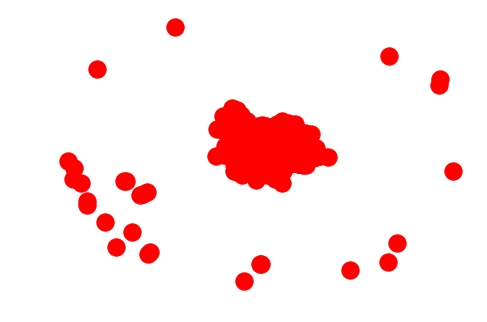

In [8]:
nx.draw(G)
plt.show()

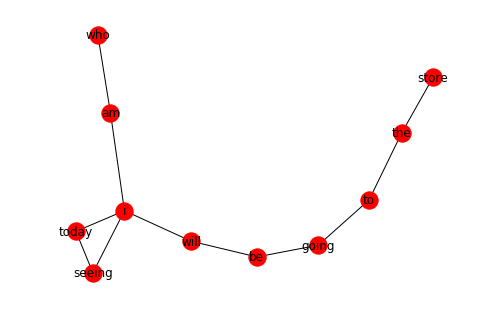

In [12]:
data = [['who', 'am', 'i', 'seeing', 'today'], ['today', 'i', 'will', 'be', 'going', 'to', 'the', 'store']]
temp = gen_graph(data)
nx.draw(temp, with_labels = True)
plt.show()

In [10]:
print(len(G.nodes))
print(len(R))

3871
2450
